In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.shape

(8950, 18)

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
scaler = StandardScaler()

In [13]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [15]:
df_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

In [16]:
# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=np.number).columns)

In [17]:
df_scaled.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
5,-0.464799,0.505405,2.799089,3.442402,0.291691,-0.468655,1.256077,2.646651,1.585600,-0.681953,-0.479437,1.944745,2.453632,1.570584,-0.280826,2.837758,0.355181
6,0.106148,0.505405,-0.271914,-0.359160,0.016743,-0.468655,1.256077,-0.686280,1.585600,-0.681953,-0.479437,-0.120467,-0.607290,-0.379914,-0.140055,-0.537727,0.355181
7,-0.279796,0.505405,-0.075655,0.033599,-0.240782,-0.468655,-0.405401,-0.408536,-0.298491,-0.681953,-0.479437,-0.398476,0.677204,-0.376747,-0.232817,-0.537727,0.355181
8,-0.691498,-1.683224,0.118213,0.401790,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.477907,1.770390,-0.212984,-0.322034,-0.537727,0.355181
9,-0.147033,0.505405,-0.048599,-0.359160,0.544353,-0.468655,1.256077,-0.686280,1.585600,-0.681953,-0.479437,-0.120467,-0.907916,-0.240984,0.551499,-0.537727,0.355181


In [18]:
#step 1
pca_model_full = PCA()
#step 2
pca_model_full.fit(df_scaled)

PCA()

In [25]:
# Get the explained variance ratio
explained_variance_full = pca_model_full.explained_variance_ratio_
cumulative_variance_full = np.cumsum(explained_variance_full)

# step 3: get the explained variance
explained_variance = pca_model_full.explained_variance_ratio_

# calculate the running total variance aka cumulative variance
pca_evr_cumsum = np.cumsum(explained_variance)
df_pca_evr = pd.DataFrame({'explained_variance_ratio': explained_variance,
                          'cumulative_explained_variance': pca_evr_cumsum})
df_pca_evr['n_components'] = df_pca_evr.index + 1
df_pca_evr.head(10)

,explained_variance_ratio,cumulative_explained_variance,n_components
0,0.272312,0.272312,1
1,0.203743,0.476055,2
2,0.089183,0.565238,3
3,0.075736,0.640974,4
4,0.062766,0.703740,5
5,0.057128,0.760868,6
6,0.049162,0.810030,7
7,0.042107,0.852138,8
8,0.036817,0.888955,9
9,0.030815,0.919770,10


Text(0, 0.5, 'Explained Variance Ratio (CumSum)')

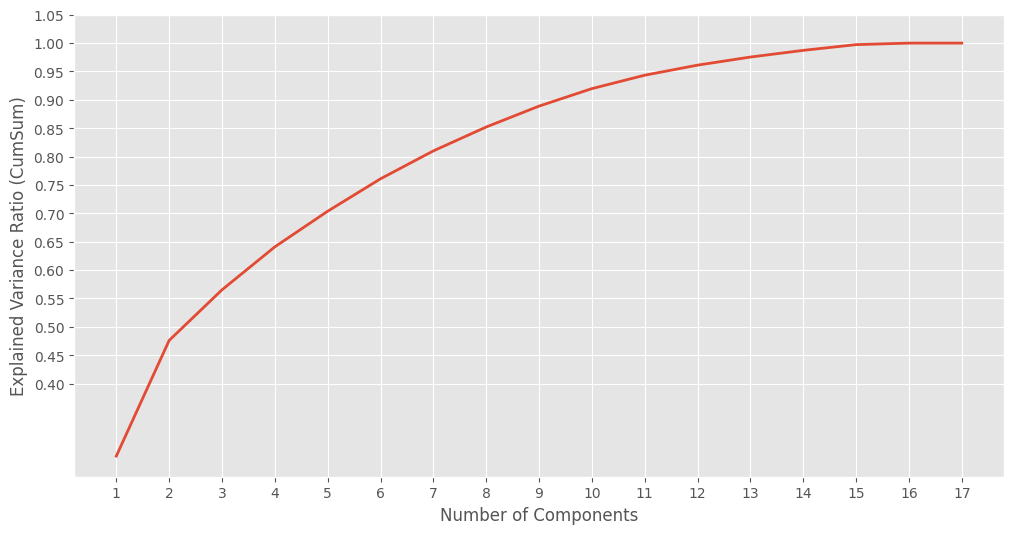

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR CumSum'], linewidth=2)
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0.4,1.1,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (CumSum)')

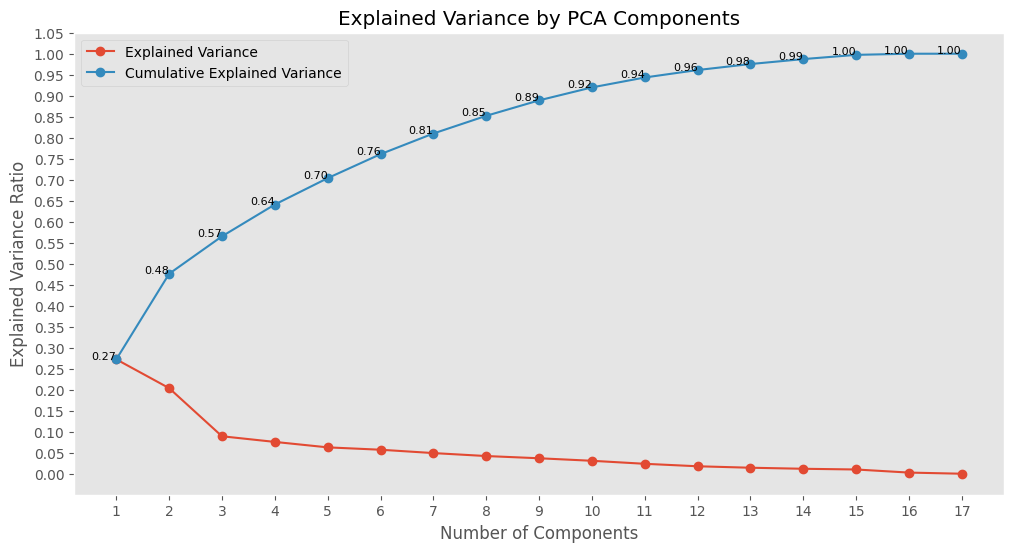

In [27]:
# Plot the explained variance
plt.figure(figsize=(12, 6))
plt.plot(df_pca_evr['n_components'], df_pca_evr['explained_variance_ratio'], marker='o', label='Explained Variance')
plt.plot(df_pca_evr['n_components'], df_pca_evr['cumulative_explained_variance'], marker='o', label='Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(df_pca_evr['n_components'])
plt.yticks(np.arange(0, 1.1, 0.05))

# add labels to the points, by showing first 2 decimal points
for i, txt in enumerate(df_pca_evr['cumulative_explained_variance']):
    txt = "{:.2f}".format(txt)
    plt.annotate(txt, (df_pca_evr['n_components'][i], df_pca_evr['cumulative_explained_variance'][i]), fontsize=8, ha='right')
plt.legend()
plt.grid()
plt.show()

In [37]:
pca_model_2 = PCA(n_components=2)
X_scaler_2_pca = pca_model_2.fit_transform(X_scaled)

In [39]:
X_scaler_2_pca.shape

(8636, 2)

/var/folders/23/4fg1l8yj45bd1l2wmk_x8b300000gn/T/ipykernel_5551/3748200585.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_scaler_2_pca[:, 0], y=X_scaler_2_pca[:, 1], palette='Set1', s=100)


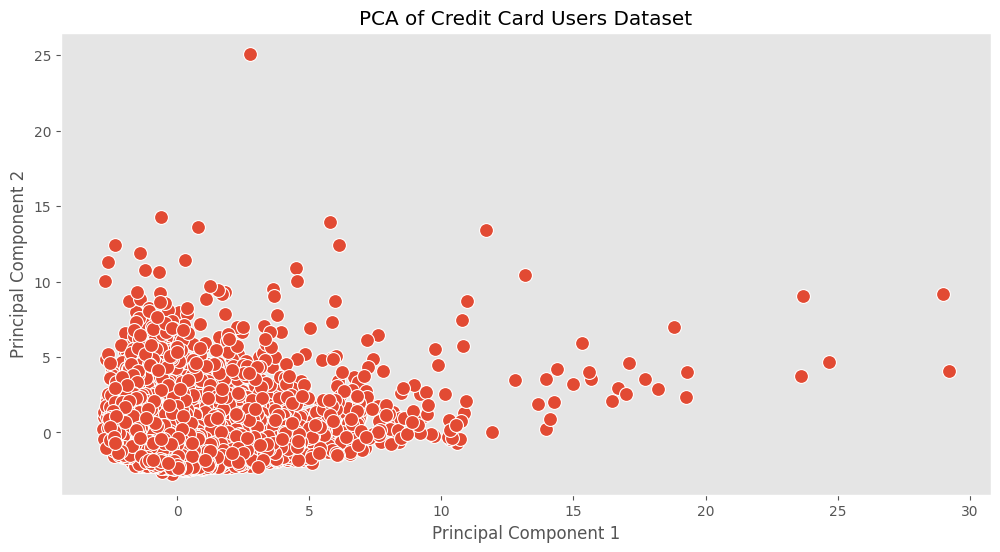

In [40]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=X_scaler_2_pca[:, 0], y=X_scaler_2_pca[:, 1], palette='Set1', s=100)
plt.title('PCA of Credit Card Users Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [41]:
pca_2_loadings = pca_model_2.components_
pca_2_loadings

array([[ 0.0919859 ,  0.10981218,  0.41215123,  0.34677536,  0.33705564,
        -0.03058765,  0.32366488,  0.29476135,  0.27722626, -0.09914541,
        -0.05696036,  0.39106653,  0.21005184,  0.26372547,  0.05932632,
         0.13056503,  0.07791867],
       [ 0.4059787 ,  0.12773873,  0.0495303 ,  0.06992965, -0.01148132,
         0.43724688, -0.1865817 , -0.01474658, -0.17357691,  0.42999689,
         0.41641184, -0.0119466 ,  0.24382309,  0.26418176,  0.17041577,
        -0.1957089 , -0.00456558]])

In [44]:
#build loadings matrix dataframe
loadings_matrix = pd.DataFrame(pca_2_loadings, columns=df_scaled.columns)
loadings_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.091986,0.109812,0.412151,0.346775,0.337056,-0.030588,0.323665,0.294761,0.277226,-0.099145,-0.056960,0.391067,0.210052,0.263725,0.059326,0.130565,0.077919
1,0.405979,0.127739,0.049530,0.069930,-0.011481,0.437247,-0.186582,-0.014747,-0.173577,0.429997,0.416412,-0.011947,0.243823,0.264182,0.170416,-0.195709,-0.004566


In [47]:
loadings_matrix = loadings_matrix.T

In [50]:
loadings_matrix.columns = ['PC1','PC2']

In [51]:
top_2_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(2).index)
top_2_loadings

,PC1,PC2
0,PURCHASES,CASH_ADVANCE
1,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY


In [52]:
top_2_loadings_val = loadings_matrix.apply(lambda x: x.abs().nlargest(2).values)
top_2_loadings_val

,PC1,PC2
0,0.412151,0.437247
1,0.391067,0.429997


In [54]:
from sklearn.cluster import KMeans

In [66]:
wcss_list, k_value_list = [], range(2,12)
for k_val in k_value_list:
    #build the model
    kmeans_model = KMeans(n_clusters=k_val, random_state=10)
    kmeans_model.fit(X_scaler_2_pca)
    #calculate the wcss value
    wcss_val = kmeans_model.inertia_
    #append wcss value
    wcss_list.append(wcss_val)
    #log
    print(f'k-means model with k = {k_val} | WCSS = {wcss_val:,}')

k-means model with k = 2 | WCSS = 51,107.98936109789
k-means model with k = 3 | WCSS = 31,904.91446516281
k-means model with k = 4 | WCSS = 23,721.57836064932
k-means model with k = 5 | WCSS = 18,760.60070762806
k-means model with k = 6 | WCSS = 17,017.872652103673
k-means model with k = 7 | WCSS = 14,122.804715898144
k-means model with k = 8 | WCSS = 11,877.320803387765
k-means model with k = 9 | WCSS = 10,526.914291115268
k-means model with k = 10 | WCSS = 9,611.903057788795
k-means model with k = 11 | WCSS = 8,815.603326722703


Text(0, 0.5, 'WCSS Value')

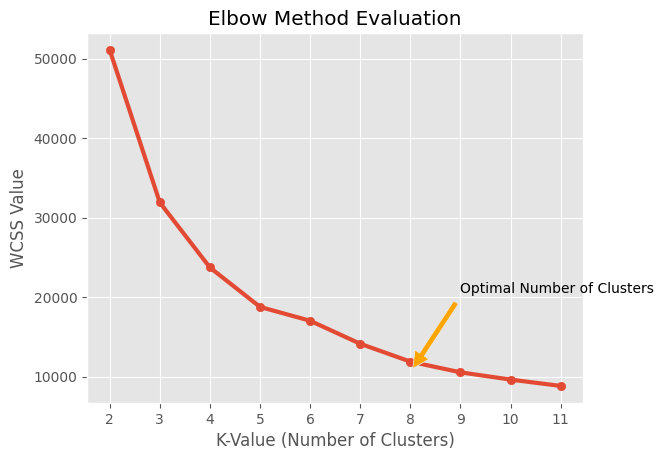

In [70]:
plt.plot(k_value_list, wcss_list, linewidth=3)
plt.scatter(k_value_list, wcss_list)
plt.xticks(k_value_list)
point_x = 8
point_y = wcss_list[point_x-1]
#add annotation
plt.annotate('Optimal Number of Clusters', xy=(point_x, point_y), xytext=(point_x+1, point_y+10000),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            )
plt.title('Elbow Method Evaluation')
plt.xlabel('K-Value (Number of Clusters)')
plt.ylabel('WCSS Value')

In [76]:
x_scaled_2_pca_df = pd.DataFrame(X_scaler_2_pca, columns=['PC1', 'PC2'])
x_scaled_2_pca_df

,PC1,PC2
0,-1.696395,-1.122584
1,-1.215681,2.435638
2,0.935853,-0.385202
3,-1.614638,-0.724586
4,0.223701,-0.783610
...,...,...
8631,-2.221637,-1.328411
8632,-0.362326,-2.032249
8633,-0.930026,-1.841236
8634,-2.356010,-0.718730


In [77]:
kmeans_model = KMeans(n_clusters=8, random_state=10)
x_scaled_2_pca_df['Cluster'] = kmeans_model.fit_predict(x_scaled_2_pca_df)
x_scaled_2_pca_df.head()

,PC1,PC2,Cluster
0,-1.696395,-1.122584,0
1,-1.215681,2.435638,5
2,0.935853,-0.385202,4
3,-1.614638,-0.724586,0
4,0.223701,-0.783610,4


In [80]:
x_scaled_2_pca_df['Cluster'].unique()

array([0, 5, 4, 3, 7, 2, 1, 6], dtype=int32)

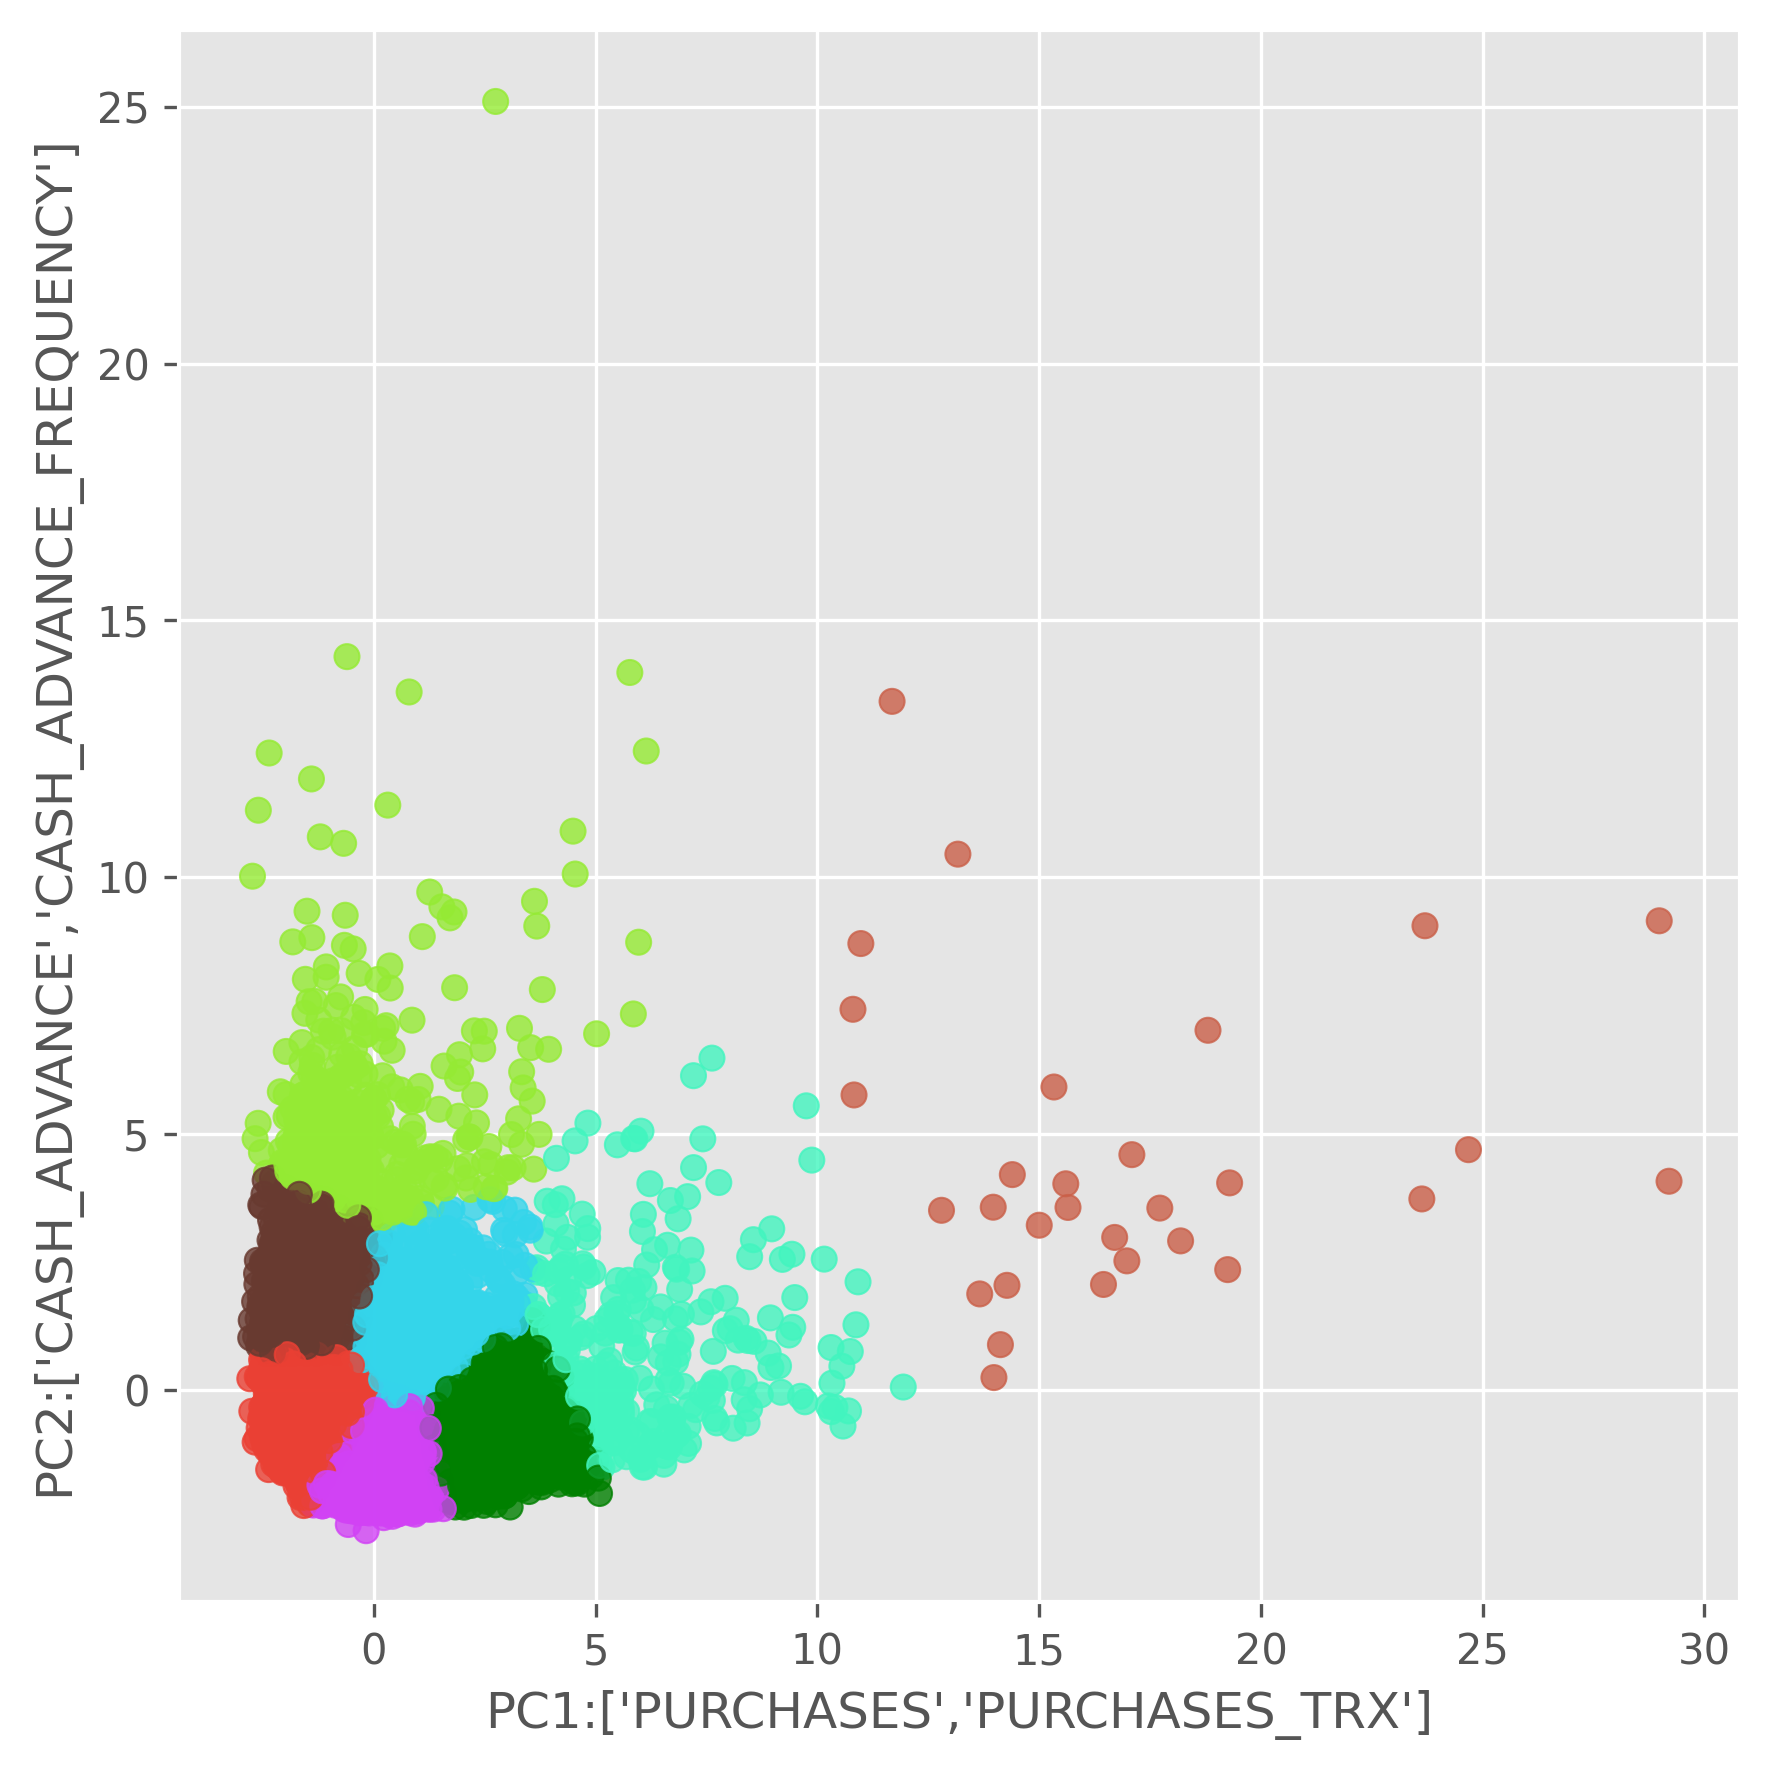

In [84]:
color_list = ['#eb4034', '#95eb34', '#34d5eb', '#42f5bf', '#d142f5', '#683a30', '#ca6049', '#008000']
x_scaled_2_pca_df['ClusterColor'] = x_scaled_2_pca_df['Cluster'].map(lambda c: color_list[c])
plt.figure(figsize=(6,6), dpi=300)
#data points
plt.scatter(x=x_scaled_2_pca_df['PC1'], y=x_scaled_2_pca_df['PC2'], c=x_scaled_2_pca_df['ClusterColor'], alpha=0.8)
plt.xlabel("PC1:['PURCHASES','PURCHASES_TRX']")
plt.ylabel("PC2:['CASH_ADVANCE','CASH_ADVANCE_FREQUENCY']")
plt.tight_layout()